<a href="https://colab.research.google.com/github/ritwiks9635/Tabular_Data_Projects_File/blob/main/IRIS_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### **Load Data**

In [4]:
data = pd.read_csv("/content/iris_synthetic_data.csv")
data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
1,5.3,4.1,1.5,0.1,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa
3,5.2,3.7,1.5,0.2,Iris-setosa
4,4.9,3.0,1.5,0.3,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  3000 non-null   float64
 1   sepal width   3000 non-null   float64
 2   petal length  3000 non-null   float64
 3   petal width   3000 non-null   float64
 4   label         3000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 117.3+ KB


In [6]:
data.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0
label,0


In [7]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,5.865267,3.051833,3.767367,1.191000
std,0.805073,0.412472,1.751183,0.758022
min,4.300000,2.000000,0.900000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.200000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Analysis Dataset**

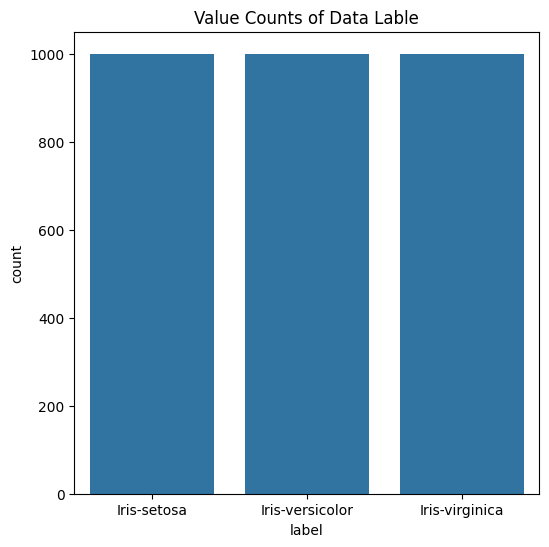

In [43]:
plt.figure(figsize=(6, 6))
sns.countplot(x = "label", data = data)
plt.title("Value Counts of Data Lable")
plt.show()

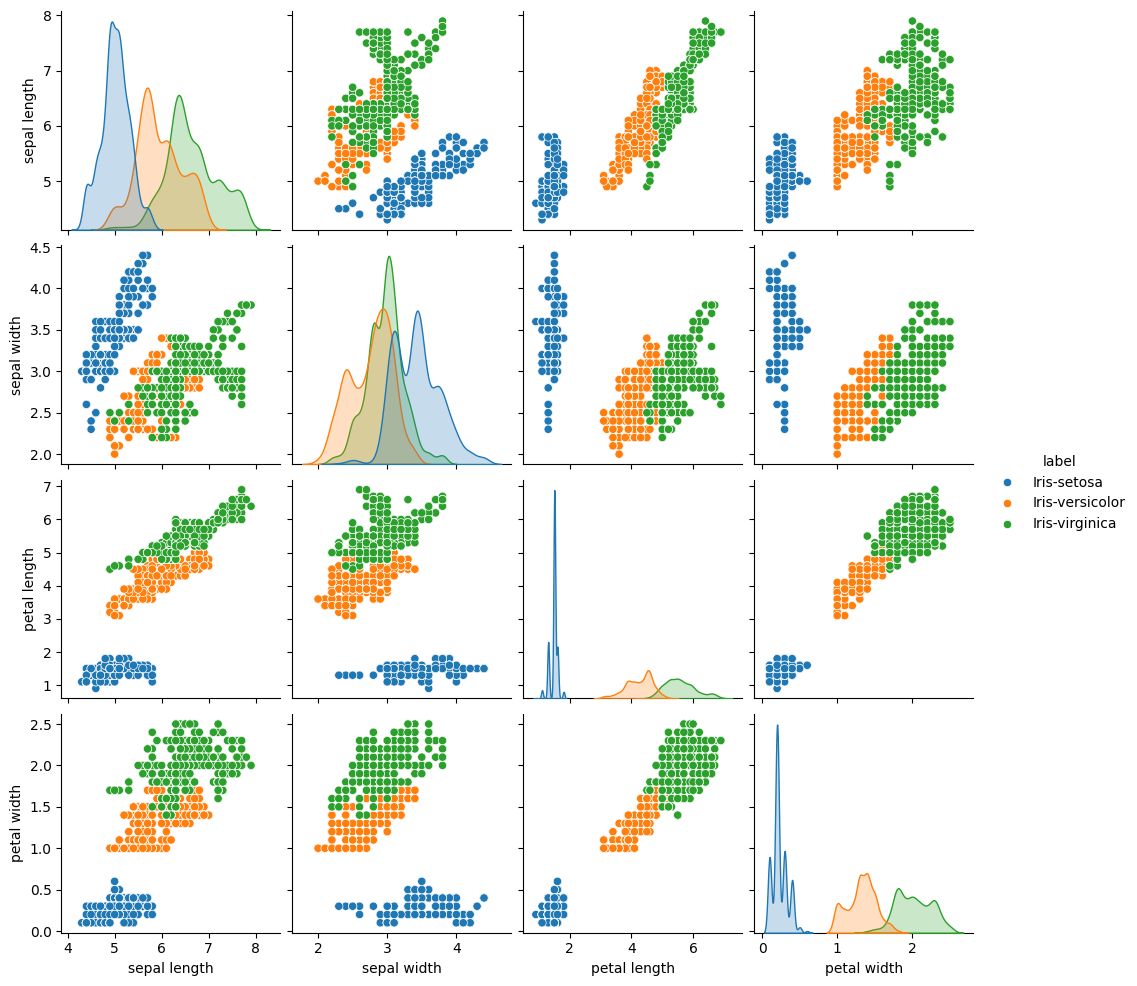

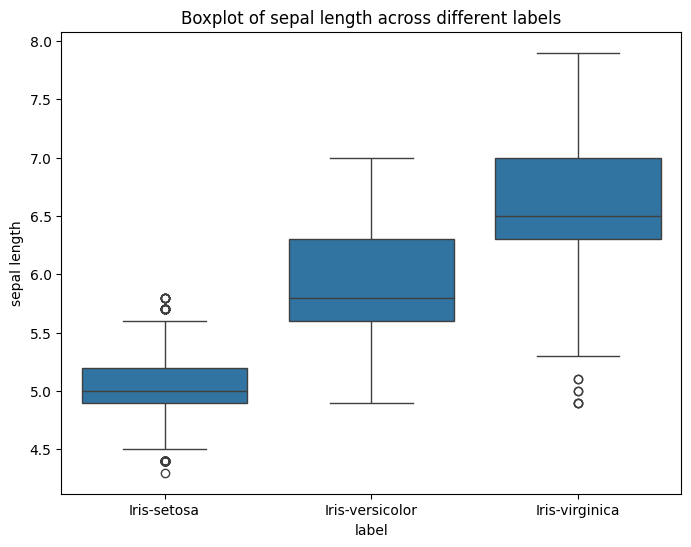

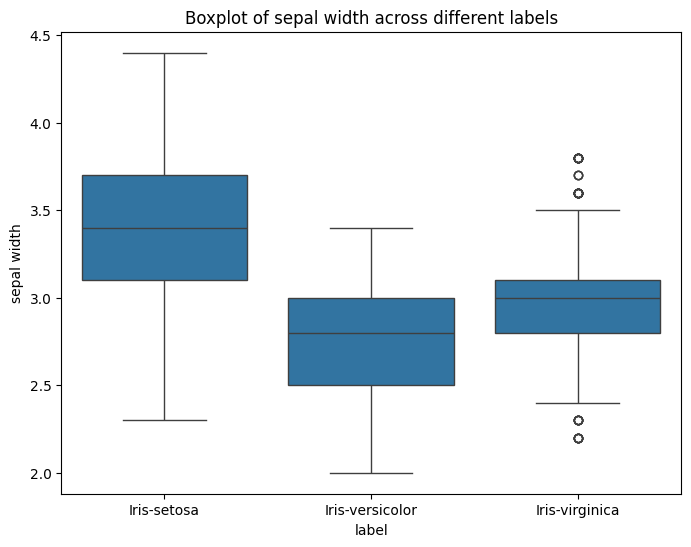

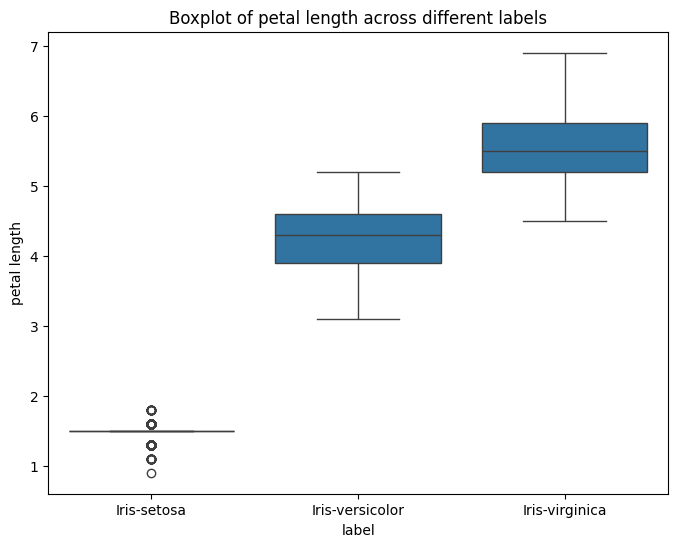

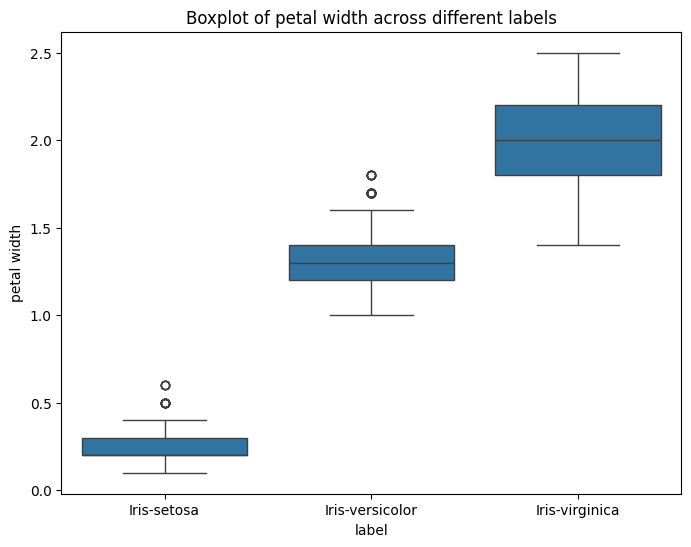

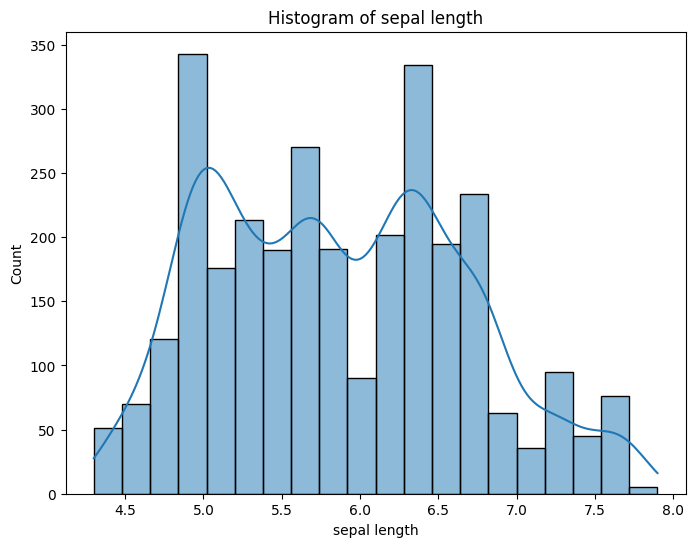

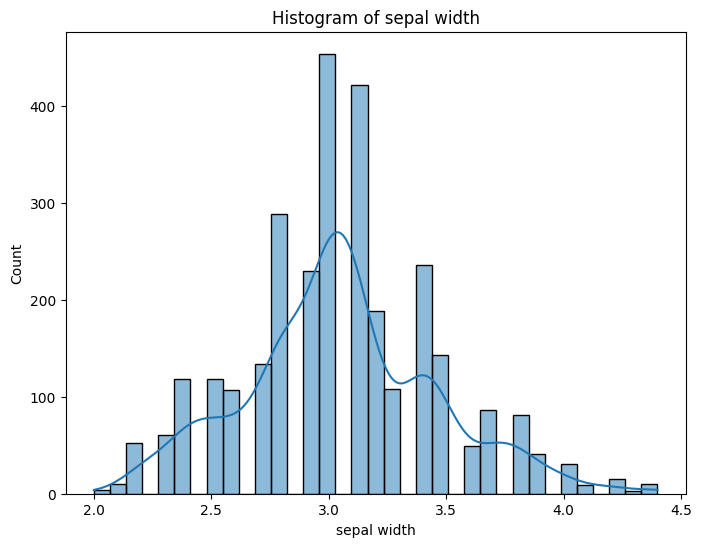

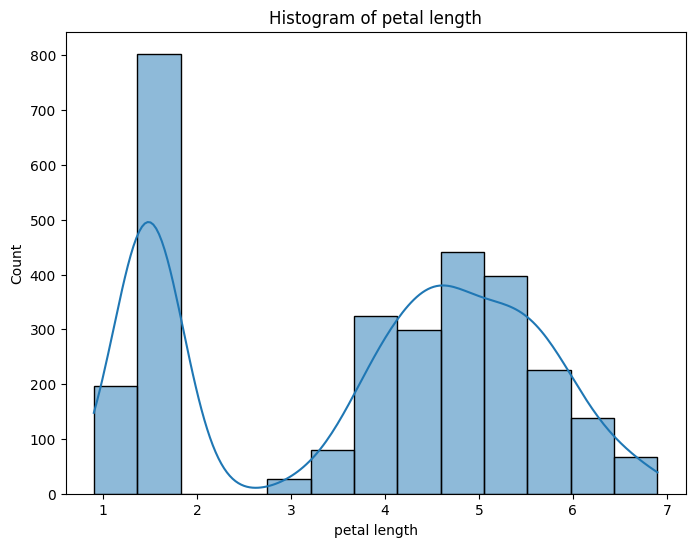

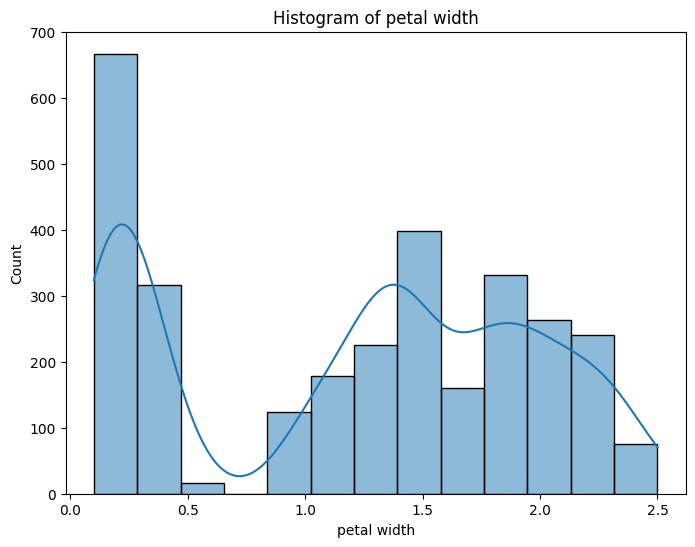

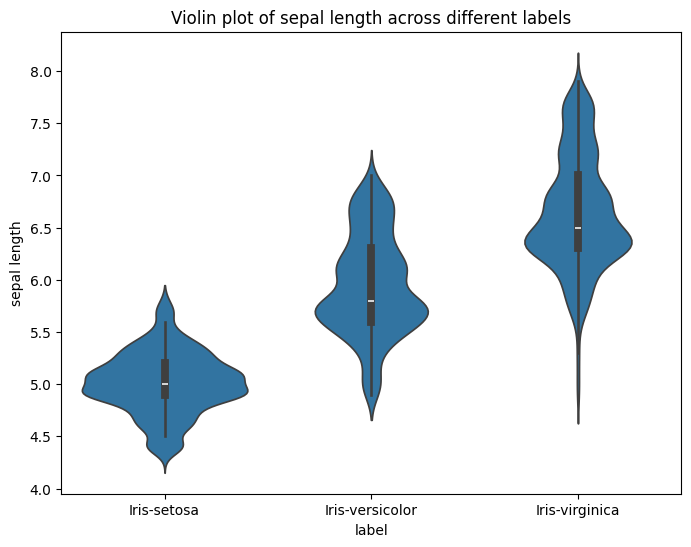

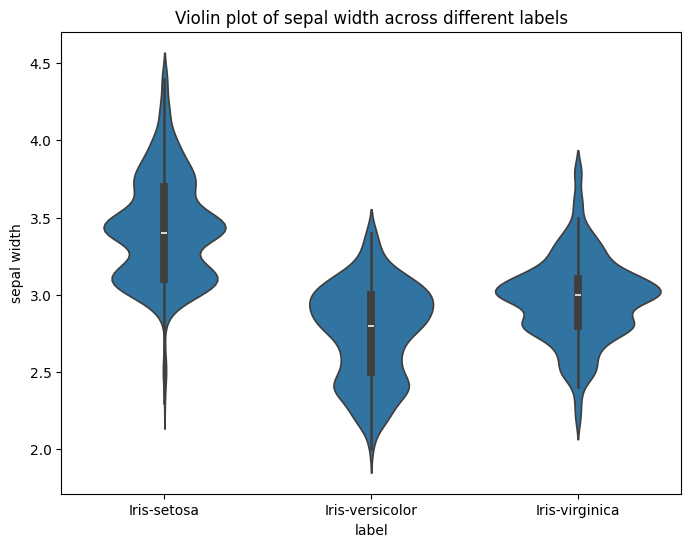

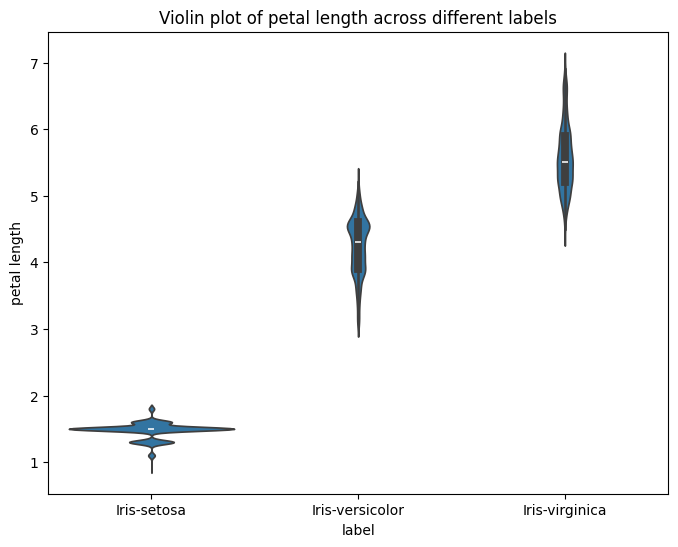

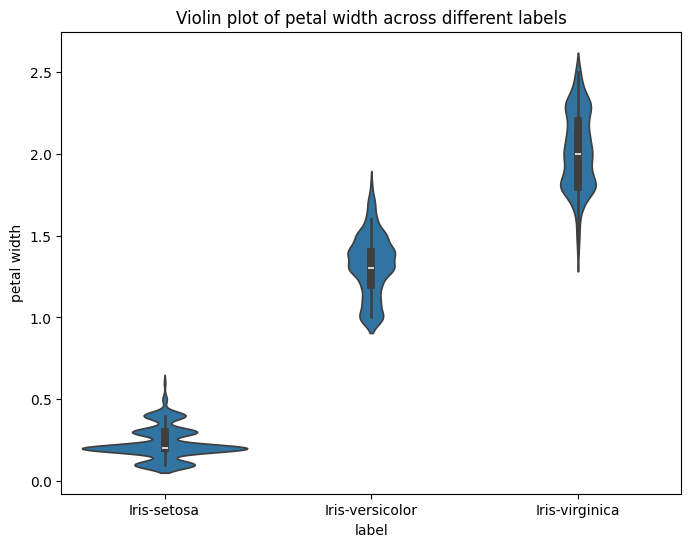

In [11]:
# Pairplot to visualize relationships between all numerical features
sns.pairplot(data, hue='label')
plt.show()


# Boxplot to compare distribution of numerical features across different labels
for col in ['sepal length', 'sepal width', 'petal length', 'petal width']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='label', y=col, data=data)
    plt.title(f'Boxplot of {col} across different labels')
    plt.show()


# Histogram for each numerical feature
for col in ['sepal length', 'sepal width', 'petal length', 'petal width']:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()


# Violinplot to visualize the distribution of numerical features by label
for col in ['sepal length', 'sepal width', 'petal length', 'petal width']:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='label', y=col, data=data)
    plt.title(f'Violin plot of {col} across different labels')
    plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

X = data.drop("label", axis = 1)
y = data["label"]

le = LabelEncoder()
y = le.fit_transform(y)

### **Build Model Pipeline**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}


# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train) #
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print the results
for name, accuracy in results.items():
    print(f'{name}: {accuracy:.4f}')

# Find the best model
best_model = max(results, key=results.get)
print(f'\nBest Model: {best_model} with accuracy {results[best_model]:.4f}')

Logistic Regression: 1.0000
Decision Tree: 1.0000
Random Forest: 1.0000
SVM: 1.0000

Best Model: Logistic Regression with accuracy 1.0000


### **Predict The Data**

In [38]:
best_model_ = models['Logistic Regression']

y_pred = best_model_.predict(X_test)
print(f"Actual labels :: {y_test[:10]}")
print()
print(f"Predicated labels :: {y_pred[:10]}")

Actual labels :: [1 1 1 0 2 1 1 2 0 2]

Predicated labels :: [1 1 1 0 2 1 1 2 0 2]


In [39]:
import pickle
pickle.dump(best_model_, open("iris_model.pkl", 'wb'))

In [42]:
# Load the trained model
with open('/content/iris_model.pkl', 'rb') as f:
    model = pickle.load(f)

def predict_label(sepal_length, sepal_width, petal_length, petal_width):
    """Predicts the iris species label based on input features."""
    input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                              columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
    prediction = model.predict(input_data)[0]
    return prediction

# Example usage
sepal_length = 5.1
sepal_width = 3.5
petal_length = 1.4
petal_width = 0.2

predicted_label = predict_label(sepal_length, sepal_width, petal_length, petal_width)
if predicted_label == 0:
    print("Predicted label: Iris-setosa")
elif predicted_label == 1:
    print("Predicted label: Iris-versicolor")
else:
    print("Predicted label: Iris-virginica")


import pickle

with open('prediction_function.pkl', 'wb') as f:
    pickle.dump(predict_label, f)

Predicted label: Iris-setosa
